In [53]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import pandas_datareader as pdr

In [54]:
#we're setting a visulization style
style.use('ggplot')

In [55]:
#we're setting a start and end datetime object
#this will be the range of dates that we're going to grab stock pricing information foR
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2016, 12, 31)

In [56]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start, end))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [57]:
tickers = ['AAPL', 'TSLA', 'BABA', 'GOOG']
all_data = get(tickers, start, end)

In [58]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

daily_close_px.head()

Ticker,AAPL,BABA,GOOG,TSLA
Date,,,,
2016-01-04,101.790649,76.690002,741.840027,223.410004
2016-01-05,99.239845,78.629997,742.580017,223.429993
2016-01-06,97.297760,77.330002,743.619995,219.039993
2016-01-07,93.191338,72.720001,726.390015,215.649994
2016-01-08,93.684120,70.800003,714.469971,211.000000


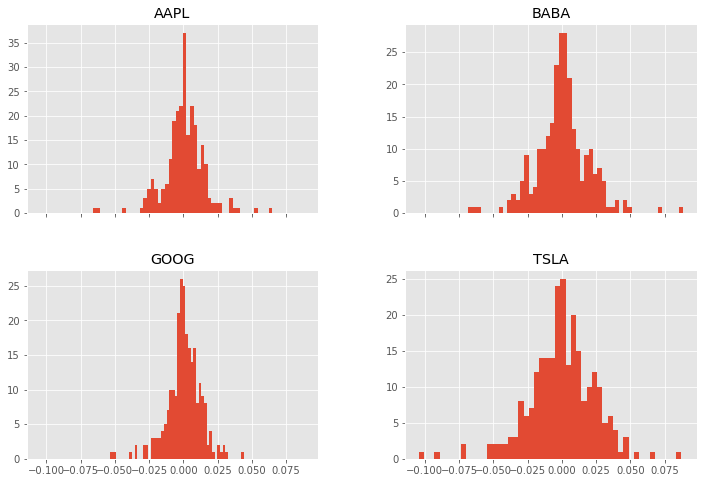

In [59]:
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [60]:
daily_pct_change.head()

Ticker,AAPL,BABA,GOOG,TSLA
Date,,,,
2016-01-04,0.000000,0.000000,0.000000,0.000000
2016-01-05,-0.025059,0.025297,0.000998,0.000089
2016-01-06,-0.019570,-0.016533,0.001400,-0.019648
2016-01-07,-0.042205,-0.059615,-0.023170,-0.015477
2016-01-08,0.005288,-0.026403,-0.016410,-0.021563


In [61]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.head()

Ticker,AAPL,BABA,GOOG,TSLA
Date,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,0.974941,1.025297,1.000998,1.000089
2016-01-06,0.955861,1.008345,1.002399,0.980440
2016-01-07,0.915520,0.948233,0.979173,0.965266
2016-01-08,0.920361,0.923197,0.963105,0.944452


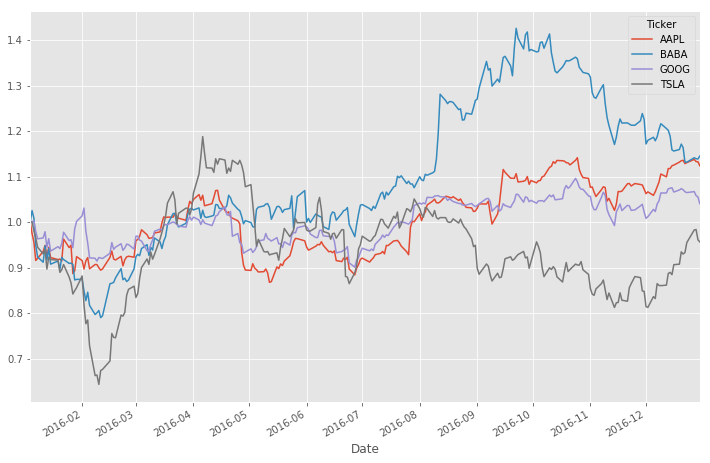

In [62]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()